In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e4/sample_submission.csv
/kaggle/input/playground-series-s3e4/train.csv
/kaggle/input/playground-series-s3e4/test.csv


In [2]:
test = pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv')
train = pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv')

In [3]:
class Wrangler:
    def __init__(self, train, test):
        self.data = {}
        self.data['train'] = train
        self.data['test'] = test
        
        print(f'Columns:')
        for col in self.data['train'].columns:
            print(col)
            
    def countna(self, data):
        print('Missing Rows')
        for col in self.data[data]:
            print(f'{col} - {sum(self.data[data][col].isna())}')
            
    def corr(self, data):
        corr = self.data[data].corr()
        plt.matshow(corr)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns, rotation=0)
        
        plt.show()


In [4]:
trn = 'train'
tst = 'test'

In [5]:
data = Wrangler(train, test)

Columns:
id
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


Missing Rows
id - 0
Time - 0
V1 - 0
V2 - 0
V3 - 0
V4 - 0
V5 - 0
V6 - 0
V7 - 0
V8 - 0
V9 - 0
V10 - 0
V11 - 0
V12 - 0
V13 - 0
V14 - 0
V15 - 0
V16 - 0
V17 - 0
V18 - 0
V19 - 0
V20 - 0
V21 - 0
V22 - 0
V23 - 0
V24 - 0
V25 - 0
V26 - 0
V27 - 0
V28 - 0
Amount - 0
Class - 0


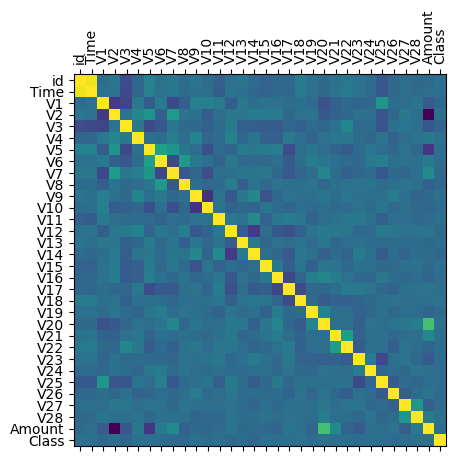

In [6]:
data.countna(trn)

data.corr(trn)